<a href="https://colab.research.google.com/github/ryoojunsang/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/MACHINE/HW2 

/content/drive/MyDrive/MACHINE/HW2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [4]:
df = pd.read_csv('./train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

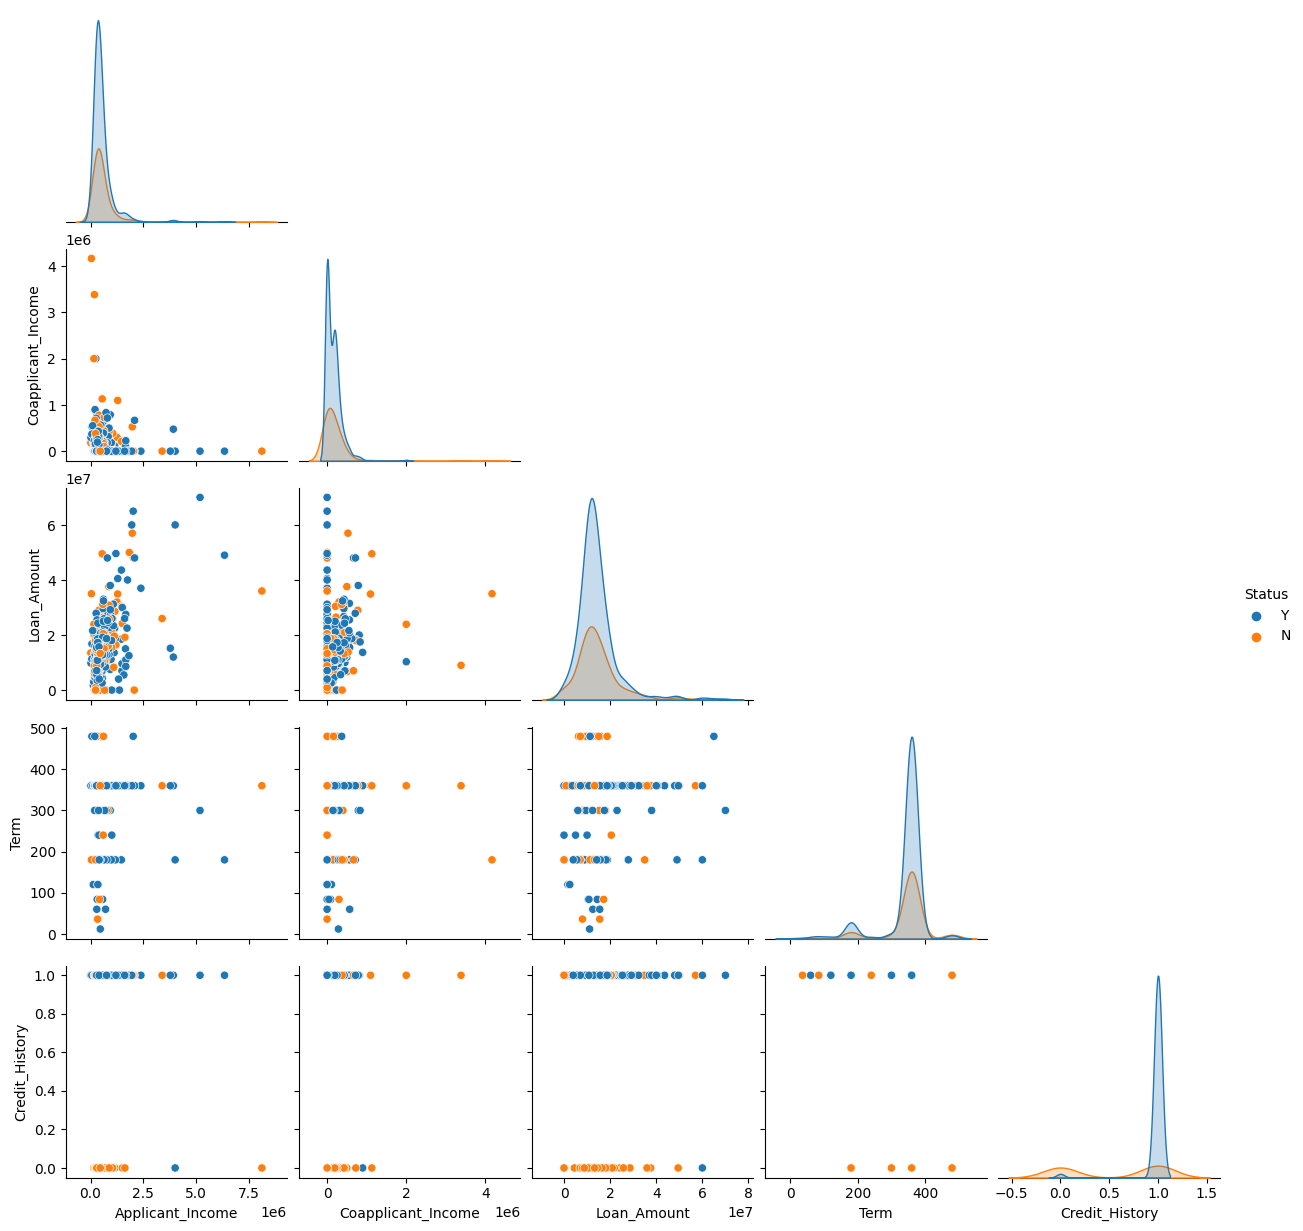

In [9]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

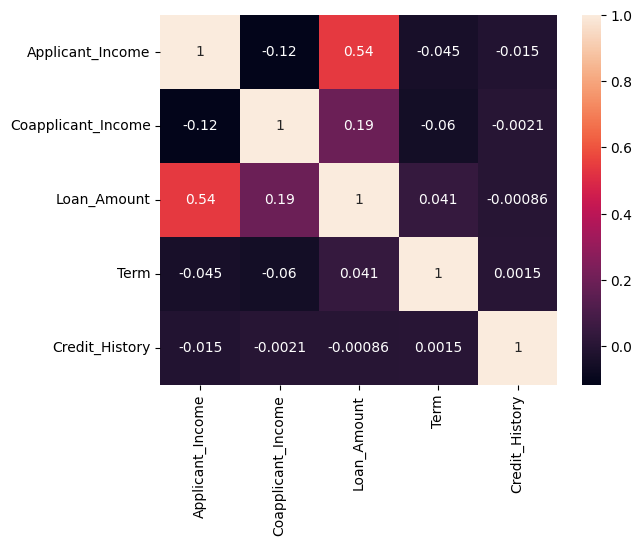

In [10]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [11]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

In [12]:
## 문제 1 ##
# 코드 작성
df = df.dropna() #겉측값이 있는 행 제거
df.dropna()
##########

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [15]:
## 문제 2 ##
# 코드 작성
le = LabelEncoder() #LabelEncoder 객체 생성
df = df.copy()
for col in categorical: #범주형 변수를 수치형 변수로
  df[col] = le.fit_transform(df[col])
##########

In [16]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term', 'Credit_History'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [17]:
import tqdm

In [18]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################

        k_near = sorted_dist[:self.k] #정렬된 거리 상위 k개 선택
        values = [] #가까운 k개의 값들을 저장할 리스트 초기화
        for j in range(self.k): #리스트에 추가
          val = self.X[feat_name].iloc[k_near[j][0]] #k개 중 j번째로 가까운 값을 선택
          values.append(val)
        if len(values) > 0:  # 가까운 값들이 존재할 때, 평균을 계산하여 샘플 데이터의 누락된 값을 대체
          X[feat_name].iloc[i] = np.mean(values)

        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
      dist = np.sqrt(np.sum((X.iloc[i] - y) ** 2)) # 유클리드 거리계산 공식으로 두 벡터 간의 차이 계산
      dist_dict[i] = dist # dist_dict의 키i에 dist 값 업데이트
     
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [19]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
imputer.fit(df)

# test set에 대해 predict를 진행합니다.
imputer.predict(df, 'Term')
imputer.predict(df, 'Credit_History')

100%|██████████| 499/499 [00:00<00:00, 124937.78it/s]


In [20]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
: -1과 1에 가까울수록 강한 관계를 가지고 있어 큰 영향을 준다. 0.53을 가지는 Credit_History가 가장 큰 영향을 주는 feature이다.

<Axes: >

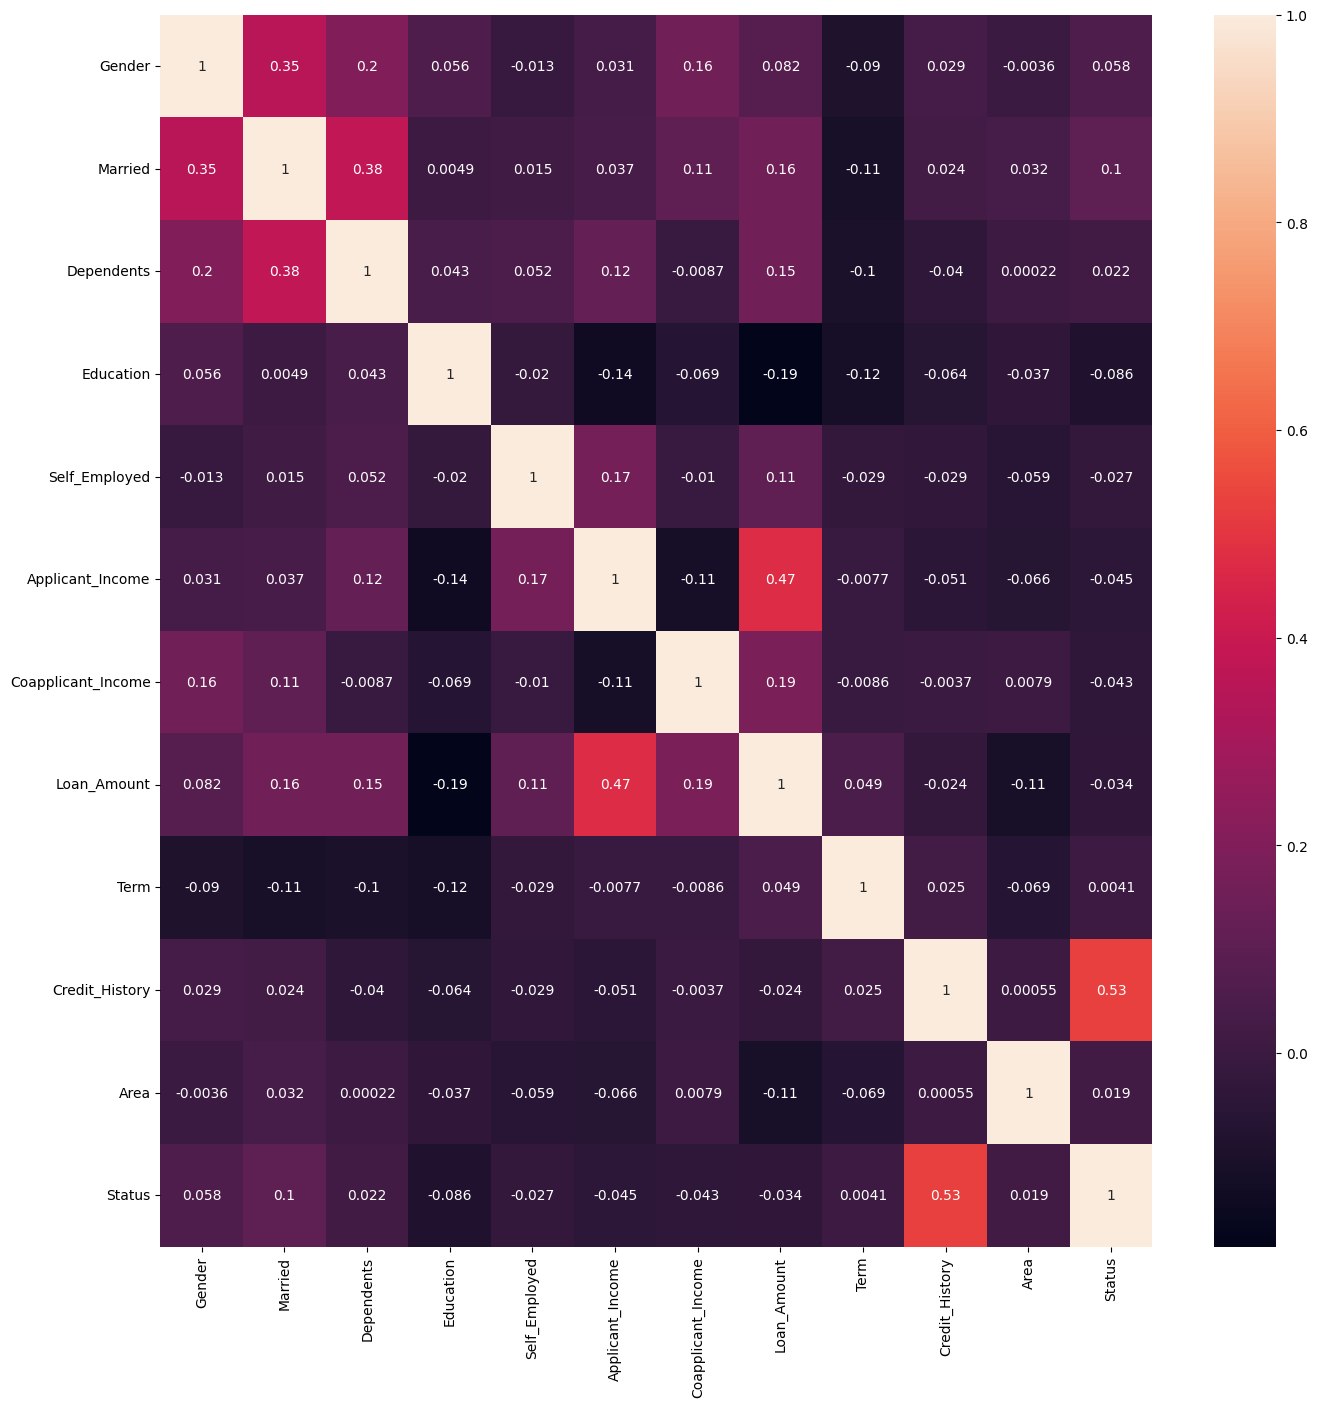

In [21]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
sns.heatmap(df.corr(),annot=True)
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (399, 11)
y_train's shape :  (399,)

X_val's shape :  (50, 11)
y_val's shape :  (50,)

X_test's shape :  (50, 11)
y_test's shape :  (50,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Best accuracy: 0.74
Best par: KNeighborsClassifier(metric='euclidean', n_neighbors=9)
Test accuracy: 0.68


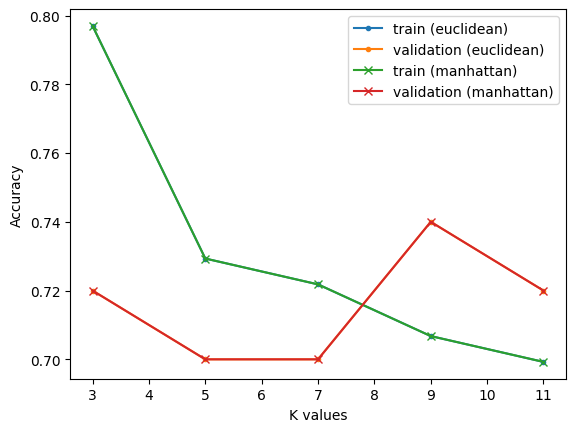

In [24]:
### 문제 1 ###
### 코드 작성 ###

dis_scale = ['euclidean', 'manhattan'] #거리 척도 생성
kval = [3,5,7,9,11] #k값 리스트 생성

best_acc = 0 #정확도 저장
best_par = None #파라미터 저장
#정확도를 저장하는 리스트 초기화
train_acc_list = [] #학습
val_acc_list = [] #검증

for dis in dis_scale: #거리 척도 반복문
  #거리 척도 바뀔 때 정확도 저장하는 리스트 초기화
  train_acc = []
  val_acc = []
  for k in kval: #k값 반복문
    knn = KNeighborsClassifier(n_neighbors=k, metric=dis) #kNN 분류기 생성
    knn.fit(X_train, y_train) #학습 데이터로 분류기 학습
    #학습 데이터 
    train_pred = knn.predict(X_train) #분류기 예측
    train_acck = metrics.accuracy_score(y_train, train_pred) #정확도 계산
    train_acc.append(train_acck) #현재 거리 척도, k값에서의 학습 정확도를 리스트에 추가
    #검증 데이터
    val_pred = knn.predict(X_val) #분류기 예측
    val_acck = metrics.accuracy_score(y_val, val_pred) #정확도 계산
    val_acc.append(val_acck) #현재 거리 척도, k값에서의 검증 정확도를 리스트에 추가
    #최고 정확도,최적의 파라미터 업데이트
    if val_acck > best_acc:
        best_acc = val_acck
        best_par = knn
    
    train_acc_list.append(train_acc) #학습 정확도 리스트를 추가
    val_acc_list.append(val_acc) #검증 정확도 리스트를 추가

best_par.fit(X_train, y_train) #최적의 모델 파라미터로 학습 데이터로 분류기 학습

# test set을 이용하여 test_accuracy 계산
test_pred = best_par.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print("Best accuracy:", best_acc)
print("Best par:", best_par)
print("Test accuracy:", test_accuracy)

plt.plot(kval, train_acc_list[0], marker='.', label=f'train ({dis_scale[0]})')
plt.plot(kval, val_acc_list[0], marker='.', label=f'validation ({dis_scale[0]})')
plt.plot(kval, train_acc_list[1], marker='x', label=f'train ({dis_scale[1]})')
plt.plot(kval, val_acc_list[1], marker='x', label=f'validation ({dis_scale[1]})')

plt.legend()
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()
################

**설명 작성**  
- 최적의 파라미터: k = 9 euclidean
- 설명: 이웃의 수가 9일 때 euclidean측정 방법을 사용할 때 가장 높은 정확도를 얻을 수 있습니다. 정확도는 0.62이 나왔습니다. 'euclidean'과'manhattan'의 값을 확인했을 때 값이 동일하게 나오는데 최적으로는 'euclidean'이 선택되었습니다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [25]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Test Accuracy: 70.00%
Best C value: 0.001


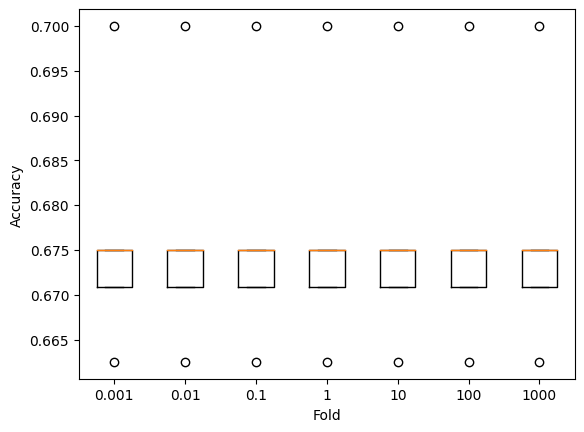

In [26]:
## 문제 6-1 ##
# 코드 작성

C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000] #리스트에 c값 저장

mean_acc = [] #평균 점수 리스트
fold_acc = [] # 각 fold의 점수 리스트
best_acc = 0 
best_C = 0 

for C in C_range:
    clf = LinearSVC(C=C, dual=False, max_iter=10000)  #C 값에 대한 선형 SVM 분류기 객체를 생성

    scores = cross_val_score(clf, X_train, y_train, cv=5) #K-fold cross-validation을 수행
    fold_acc.append(scores) # 각 fold의 정확도를 리스트에 추가
    mean_score = sum(scores)/len(scores) #평균 정확도 계산 (리스트 값을 모두 더한 후 fold의 수로 나눔)
    mean_acc.append(mean_score) # 평균 정확도를 리스트에 추가

    if mean_score > best_acc: #가장 높은 점수와 그 떄의 c값을 저장
        best_acc = mean_score
        best_C = C

best_c = mean_acc.index(max(mean_acc)) #가장 높은 평균 정확도를 갖는 c값을 할당

best_clf = LinearSVC(C=best_C, dual=False, max_iter=10000) #가장 높은 점수의 c값으로 LinearSVC모델 생성

best_clf.fit(X_train, y_train) #가장 높은 평균 정확도를 갖는 c값으로 학습
test_acc = best_clf.score(X_test, y_test)#데이터에 대한 정확도 계산

print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print("Best C value:", best_C)

plt.boxplot(fold_acc, labels=C_range) # 각 c값마다 fold의 점수를 boxplot으로 나타냄
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

############

**설명 작성**  
- 최적의 파라미터:모든 파라미터에서 같은 값이 나온다
- 설명: LinearSVC 모델의 C 파라미터를 최적화하는 코드이다. cross-validation을 이용해 평균 정확도를 이용해 최적의 파라미터를 찾는다. 모두 같은 값이 나와버려 가장 앞의 0.001이 코드에서 출력된다

Test accuracy: 0.7
Best C value: 0.001


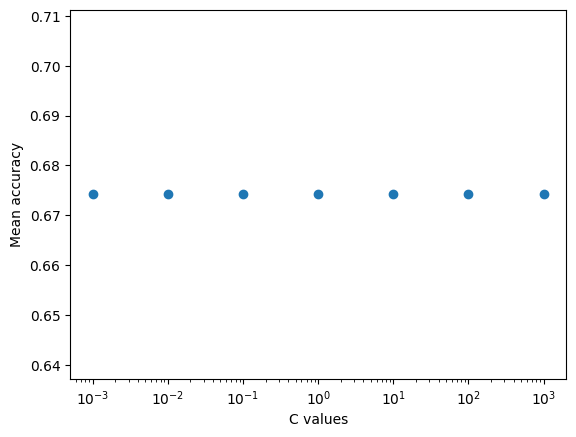

In [27]:
## 문제 6-2 ##
# 코드 작성
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000] #리스트에 c값 저장
mean_scores = [] #평균 정확도를 저장
std_scores = [] #표준 편차 저장
for C in C_range:
    clf = LinearSVC(C=C, dual=False, max_iter=10000) #C 값에 대한 선형 SVM 분류기 객체를 생성
    loo = LeaveOneOut() #Leave-One-Out 교차 검증 객체를 생성

    scores = cross_val_score(clf, X_train, y_train, cv=loo) #교차 검증 수행, 정확도 계산 후 저장

    mean_score = np.mean(scores) #scores 평균 계산 후 저장
    std_score = np.std(scores) #scores 표준 편차 계산 후 저장

    mean_scores.append(mean_score) #mean_score 값을 리스트에 저장
    std_scores.append(std_score) #std_score 값을 리스트에 저장


max_score_index = mean_scores.index(max(mean_scores)) #mean_scores에서 가장 높은 값을 찾음
best_C = C_range[max_score_index] #가장 높은 평균 정확도를 가지는 C

clf = LinearSVC(C=best_C, dual=False, max_iter=10000) #가장 높은 평균 정확도를 가지는 C 값으로 선형 SVM 분류기 객체를 생성
clf.fit(X_train, y_train) #훈련 데이터에 대해 분류기를 학습

test_score = clf.score(X_test, y_test) #테스트 세트에서 정확도를 계산 후 저장
print('Test accuracy:', test_score)
print("Best C value:", best_C)

plt.scatter(C_range, mean_scores) #평균 정확도를 scatter 그래프로 그림
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Mean accuracy')
plt.show()

############

**설명 작성**  
- 최적의 파라미터: 모든 파라미터에서 같은 값이 나온다
- 설명:Leave-One-Out Cross Validation을 사용하여 각각의 C 값에 대해 모델의 성능을 측정하고, 가장 높은 평균 정확도를 보인 C 값을 최적의 파라미터로 선택했다.

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [28]:
## 문제 7-1 ##
# 코드 작성
C = 2
k = 5
kernel_type = 'rbf'
svc = SVC(kernel=kernel_type, C=C) #sbf kernel svm 모델 객체를 생성

scores = cross_val_score(svc, X_train, y_train, cv=k) #cross-validation 정확도 계산

print('Accuracy:', scores.mean()) #cross-validation 정확도를 출력

#최적의 하이퍼 파라미터
best_svc = SVC(kernel=kernel_type, C=C) #SVC 객체 생성
best_svc.fit(X_train, y_train) #훈련 데이터를 학습
test_acc = best_svc.score(X_test, y_test) #테스트 데이터에 대한 예측을 수행, 테스트 데이터에 대한 정확도를 계산

print("Test Accuracy: {:.2f}%".format(test_acc * 100)) #테스트 데이터에 대한 정확도를 출력
############

Accuracy: 0.6691772151898734
Test Accuracy: 74.00%


In [29]:
## 문제 7-2 ##
# 코드 작성
C = 2
kernel_type = 'rbf'

mean_scores = []
std_scores = []

clf = SVC(kernel=kernel_type, C=C) #svc 객체 생성 코드
loo = LeaveOneOut() #Leave-One-Out 교차 검증

scores = cross_val_score(clf, X_train, y_train, cv=loo) #정확도 점수 저장

#계산된 정확도 점수의 평균과 표준 편차를 계산하여 저장
mean_score = np.mean(scores)
std_score = np.std(scores)
mean_scores.append(mean_score)
std_scores.append(std_score)

max_score_index = mean_scores.index(max(mean_scores)) #최고 정확도를 가진 인덱스 찾기
best_C = C_range[max_score_index] #C값을 best_C에 저장

clf = SVC(kernel=kernel_type, C=best_C) #best_C 값을 사용하여 SVM 모델을 초기화
clf.fit(X_train, y_train) #모델 학습

test_score = clf.score(X_test, y_test) #데이터에 대한 예측을 수행, 정확도 계산
print('Test accuracy:', test_score)
print("Best C value:", best_C)
############

Test accuracy: 0.74
Best C value: 0.001


**7-3 설명 작성**  
- 설명: 두가지 모델을 사용했을 때 동일한 결과가 나왔는데 이런 경우는 선형적으로 분리 가능한 경우입니다. 주어진 데이터는 두개의 클래스를 분류하는 선형 관계였습니다.

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [32]:
## 문제 8-1 ##
## 코드 작성 ##
rfc = RandomForestClassifier() #RandomForest 분류기 객체 생성

grid = GridSearchCV(rfc, param_grid, cv=5) #GridSearch 교차 검증 수행
grid.fit(X_train, y_train) #최적의 매개변수를 가진 분류기를 학습

print("Best parameters:", grid.best_params_) #최적의 매개변수를 출력함
print("Best accuracy:", grid.best_score_) #교차 검증 평균 점수를 출력함
############

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}
Best accuracy: 0.8095253164556961


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
## 문제 8-2 ##
## 코드 작성 ##
best_params = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200} #best parameter

rf = RandomForestClassifier(**best_params) #best parameter로 RandomForestClassifier 모델 생성

rf.fit(X_train, y_train) #모델 학습

y_pred = rf.predict(X_test) #테스트 데이터 예측 수행

test_accuracy = accuracy_score(y_test, y_pred) #모델의 정확도 계산

print('Test accuracy:', test_accuracy) #테스트 정확도 출력
############

Test accuracy: 0.82
